<a href="https://colab.research.google.com/github/kolasyam/Hate-Speech-Detection-using-LSTM/blob/main/Hate_Speech_Detection_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hate Speeh Detection using LSTM

In [133]:
# importing libraries
import pandas as pd
import spacy
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras as keras
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [85]:
df = pd.read_csv('/content/hate_speech_data.csv')

In [86]:
df.shape

(24783, 7)

In [87]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [88]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [89]:
# deleting unwanted columns
df.drop(columns =['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither'], inplace = True)

In [90]:
df.head()

,class,tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [91]:
# checking null values
df.isnull().sum()

,0
class,0
tweet,0


In [92]:
df['tweet'].iloc[0]

"!!! RT @mayasolovely: As a woman you shouldn't complain about cleaning up your house. &amp; as a man you should always take the trash out..."

In [93]:
# deleting unwanted symbols and numeric data
df['processed_tweet'] = df['tweet'].str.replace(r'[^a-zA-Z ]', ' ', regex=True)

In [94]:
df['tweet'].iloc[1000]

'&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;&#128514;"@betysweetcocker: That pussy is just....&#128561; imma assume she just had a baby like..the day before"'

In [95]:
df.head()

,class,tweet,processed_tweet
0,2,!!! RT @mayasolovely: As a woman you shouldn't...,RT mayasolovely As a woman you shouldn t...
1,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,RT mleew boy dats cold tyga dwn ba...
2,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,RT UrKindOfBrand Dawg RT sbaby...
3,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,RT C G Anderson viva based she lo...
4,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,RT ShenikaRoberts The shit you...


In [96]:
df['processed_tweet'].iloc[1000]

'                                                                 betysweetcocker  That pussy is just              imma assume she just had a baby like  the day before '

In [97]:
# handling unwanted spaces
df['processed_tweet_2'] = df['processed_tweet'].str.replace(r'[\s]+', ' ', regex=True)

In [98]:
df['processed_tweet_2'].iloc[1000]

' betysweetcocker That pussy is just imma assume she just had a baby like the day before '

In [99]:
# deleting unwanted columns
df.drop(columns = ['tweet', 'processed_tweet'], inplace=True)

In [100]:
df.head()

,class,processed_tweet_2
0,2,RT mayasolovely As a woman you shouldn t comp...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...
3,1,RT C G Anderson viva based she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...


In [101]:
# NLP
nlp = spacy.load('en_core_web_sm')

In [102]:
# lemmatization
def lemmatization(text):
  doc = nlp(text)
  lemmaList = [word.lemma_ for word in doc]
  return ' '.join(lemmaList)

In [103]:
df['lemma_tweet'] = df['processed_tweet_2'].apply(lemmatization)

In [104]:
df.head()

,class,processed_tweet_2,lemma_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...


In [105]:
df['processed_tweet_2'].iloc[67]

' Allyhaaaaa Lemmie eat a Oreo amp do these dishes One oreo Lol'

In [106]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [107]:
# removing the stopwords
def remove_stopwords(text):
  doc = nlp(text)
  no_stop_words = [word.text for word in doc if not word.is_stop]
  return ' '.join(no_stop_words)

In [108]:
df['final_tweet'] = df['lemma_tweet'].apply(remove_stopwords)

In [109]:
df['lemma_tweet'].iloc[67]

'  Allyhaaaaa Lemmie eat a Oreo amp do these dish one oreo lol'

In [110]:
df['final_tweet'].iloc[67]

'   Allyhaaaaa Lemmie eat Oreo amp dish oreo lol'

In [111]:
df.head()

,class,processed_tweet_2,lemma_tweet,final_tweet
0,2,RT mayasolovely As a woman you shouldn t comp...,RT mayasolovely as a woman you shouldn t com...,RT mayasolovely woman shouldn t complain cl...
1,1,RT mleew boy dats cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad for cuffi...,RT mleew boy dat cold tyga dwn bad cuffin d...
2,1,RT UrKindOfBrand Dawg RT sbaby life You ever ...,RT UrKindOfBrand Dawg RT sbaby life you ever...,RT UrKindOfBrand Dawg RT sbaby life fuck bi...
3,1,RT C G Anderson viva based she look like a tr...,RT C G Anderson viva base she look like a tr...,RT C G Anderson viva base look like tranny
4,1,RT ShenikaRoberts The shit you hear about me ...,RT ShenikaRoberts the shit you hear about I ...,RT ShenikaRoberts shit hear true faker bitc...


In [112]:
# one - hot representation
vocab_size =1000
one_hot_representation = [one_hot(words, vocab_size) for words in df['final_tweet']]

In [113]:
for i in range(0,4):
    print(df['final_tweet'].iloc[i])

   RT mayasolovely woman shouldn t complain clean house amp man trash
   RT mleew boy dat cold tyga dwn bad cuffin dat hoe st place
   RT UrKindOfBrand Dawg RT sbaby life fuck bitch start cry confuse shit
   RT C G Anderson viva base look like tranny


In [114]:
one_hot_representation[100]

[795,
 816,
 639,
 616,
 20,
 281,
 748,
 903,
 335,
 198,
 282,
 542,
 946,
 210,
 286,
 276,
 237]

In [115]:
for i in range(0,4):
    print(one_hot_representation[i])

[864, 996, 193, 119, 903, 116, 200, 221, 968, 399, 937]
[864, 314, 712, 458, 953, 563, 257, 401, 411, 458, 396, 843, 753]
[864, 460, 34, 864, 220, 841, 518, 542, 413, 902, 454, 276]
[864, 97, 733, 937, 424, 648, 260, 210, 982]


In [116]:
sentence_length = 20
embedding_tweet = pad_sequences(one_hot_representation, padding='pre', maxlen=sentence_length)

In [117]:
for i in range(0,4):
    print(embedding_tweet[i])

[  0   0   0   0   0   0   0   0   0 864 996 193 119 903 116 200 221 968
 399 937]
[  0   0   0   0   0   0   0 864 314 712 458 953 563 257 401 411 458 396
 843 753]
[  0   0   0   0   0   0   0   0 864 460  34 864 220 841 518 542 413 902
 454 276]
[  0   0   0   0   0   0   0   0   0   0   0 864  97 733 937 424 648 260
 210 982]


In [118]:
x = np.array(embedding_tweet)
y = np.array(df['class'])

In [119]:
df['class'].value_counts()

,count
class,
1,19190
2,4163
0,1430


In [120]:
smote = SMOTE(sampling_strategy='minority')
x, y = smote.fit_resample(x, y)

In [121]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [122]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((34034, 20), (8509, 20), (34034,), (8509,))

In [123]:
# 12. CREATING MODEL

dimension = 50

model = keras.Sequential([
    #embedding layer
    keras.layers.Embedding(vocab_size, dimension, input_length = sentence_length),
    # LSTM layer
    keras.layers.LSTM(100,return_sequences=True),
    keras.layers.LSTM(50, return_sequences=True),
    keras.layers.LSTM(50),
    #output layer
    keras.layers.Dense(3, activation = 'softmax')
])

#compilation
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
model.summary()

In [125]:
model.fit(X_train, y_train, epochs = 10, batch_size = 32)

Epoch 1/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 48s 39ms/step - accuracy: 0.7493 - loss: 0.5834
Epoch 2/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 42s 40ms/step - accuracy: 0.8954 - loss: 0.3076
Epoch 3/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9011 - loss: 0.2859
Epoch 4/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 81s 38ms/step - accuracy: 0.9090 - loss: 0.2653
Epoch 5/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 43s 40ms/step - accuracy: 0.9129 - loss: 0.2487
Epoch 6/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 57s 54ms/step - accuracy: 0.9164 - loss: 0.2391
Epoch 7/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 66s 39ms/step - accuracy: 0.9235 - loss: 0.2171
Epoch 8/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 44s 41ms/step - accuracy: 0.9291 - loss: 0.2035
Epoch 9/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 41s 38ms/step - accuracy: 0.9355 - loss: 0.1867
Epoch 10/10
1064/1064 ━━━━━━━━━━━━━━━━━━━━ 41s 39ms/step - accuracy: 0.9414 - loss: 0.1733


In [128]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Model Accuracy: {accuracy * 100}')

266/266 ━━━━━━━━━━━━━━━━━━━━ 7s 24ms/step - accuracy: 0.8761 - loss: 0.3996
Model Accuracy: 86.83746457099915


In [129]:
pred = np.argmax(model.predict(X_test), axis=-1)

266/266 ━━━━━━━━━━━━━━━━━━━━ 8s 26ms/step


In [130]:
y_test[:5]

array([1, 1, 0, 1, 2])

In [131]:
pred[:5]

array([1, 1, 0, 1, 2])

In [132]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.89      0.88      0.89      3812
           1       0.89      0.91      0.90      3807
           2       0.68      0.66      0.67       890

    accuracy                           0.87      8509
   macro avg       0.82      0.81      0.82      8509
weighted avg       0.87      0.87      0.87      8509



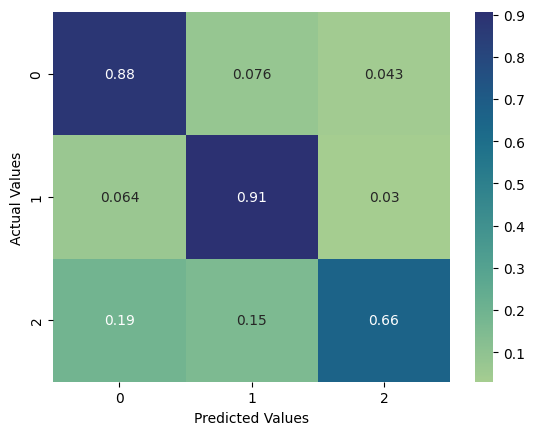

In [134]:
cf = confusion_matrix(y_test, pred, normalize = 'true')
sns.heatmap(cf, annot = True, cmap = 'crest')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()